<a href="https://colab.research.google.com/github/AlienX77-cmd/Computational-Finance/blob/main/ARIMA_Modeling_Kittipak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import statsmodels
print("Statsmodels Version: ", statsmodels.__version__)

warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

Statsmodels Version:  0.14.0


In [117]:
import yfinance as yf

# Thai Oil Public Company Limited
# Ticker = TOP.BK

df = yf.download("TOP.BK", start="2021-01-01", end="2023-01-01")
df.fillna(method='bfill', inplace=True) #ถ้ามี null value ใน feature ใดก็ตาม ให้ทำการ replace ด้วย bfill method (เอาค่าก่อนหน้ามาแทนที่)
df.tail(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,55.25,56.25,55.25,55.75,53.351559,4683400
2022-12-27,56.25,56.50,56.00,56.25,53.830051,5771500
2022-12-28,56.25,56.50,56.00,56.00,53.590809,4383400
2022-12-29,56.00,56.50,55.75,56.50,54.069294,7509300
2022-12-30,56.25,56.75,56.25,56.25,53.830051,5707400


In [118]:
# Import as Dataframe
df.rename(columns={'Adj Close':'value'}, inplace=True)
print(df.shape)
df

(482, 6)


,Open,High,Low,Close,value,Volume
Date,,,,,,
2021-01-04,50.75,55.00,50.50,54.75,47.519093,15709600
2021-01-05,54.25,57.00,53.50,56.25,48.820988,22047900
2021-01-06,58.75,59.75,56.50,57.00,49.471935,21155200
2021-01-07,57.75,58.00,56.25,57.00,49.471935,11999400
2021-01-08,57.75,58.50,56.50,57.50,49.905899,16910900
...,...,...,...,...,...,...
2022-12-26,55.25,56.25,55.25,55.75,53.351559,4683400
2022-12-27,56.25,56.50,56.00,56.25,53.830051,5771500
2022-12-28,56.25,56.50,56.00,56.00,53.590809,4383400


In [124]:
df1 = df["value"]
df1.reset_index(drop=True, inplace=True)

In [125]:
df1.head(5)

0    47.519093
1    48.820988
2    49.471935
3    49.471935
4    49.905899
Name: value, dtype: float64

In [119]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.382122
p-value: 0.146846


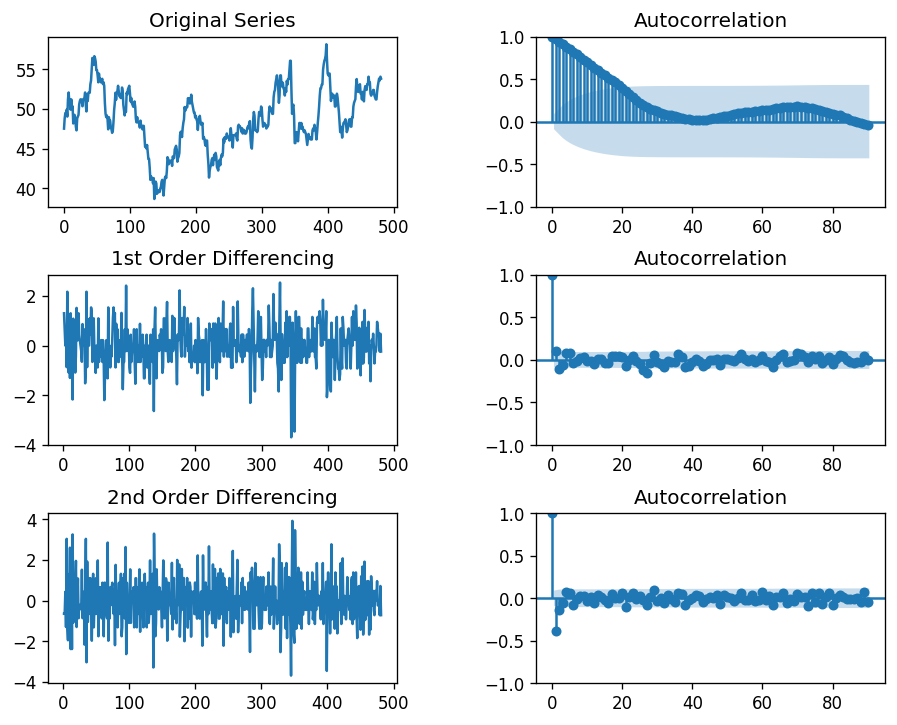

In [129]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
#axes[2, 1].set_xlim(0,90)
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots

axes[0, 0].plot(df1)
axes[0, 0].set_title('Original Series')
plot_acf(df1, ax=axes[0, 1], lags=90)  # Set lags to 100
#axes[0, 1].set_xlim(0, 100)  # Set x-axis limits to 0-100

# 1st Differencing
axes[1, 0].plot(df1.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.diff().dropna(), ax=axes[1, 1], lags=90)  # Set lags to 100
#axes[1, 1].set_xlim(0, 100)  # Set x-axis limits to 0-100

# 2nd Differencing
axes[2, 0].plot(df1.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.diff().diff().dropna(), ax=axes[2, 1], lags=90)  # Set lags to 100
#axes[2, 1].set_xlim(0, 100)  # Set x-axis limits to 0-100

plt.show()